In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset

df_train = pd.read_csv('data/Train.csv')
df_test = pd.read_csv('data/Test.csv')
df_sample_submission = pd.read_csv('data/SampleSubmission.csv')

In [3]:
# Display column names for training set
print("Column Names:")
print(df_train.columns)


Column Names:
Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimu

In [4]:
# Display column names for test set
print("Column Names:")
print(df_test.columns)

Column Names:
Index(['Place_ID X Date', 'Date', 'Place_ID',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle',
    

In [5]:
# Compare columns

# Get the column names of both datasets
train_columns = set(df_train.columns)
test_columns = set(df_test.columns)

# Find common columns
common_columns = train_columns.intersection(test_columns)

# Find columns that are in the training set but not in the test set
train_only_columns = train_columns - test_columns

# Find columns that are in the test set but not in the training set
test_only_columns = test_columns - train_columns

# Print the results
print(f"Number of common columns: {len(common_columns)}")
print(f"Common columns: {common_columns}")

print(f"\nNumber of columns only in training set: {len(train_only_columns)}")
print(f"Columns only in training set: {train_only_columns}")

print(f"\nNumber of columns only in test set: {len(test_only_columns)}")
print(f"Columns only in test set: {test_only_columns}")

Number of common columns: 77
Common columns: {'L3_CLOUD_cloud_optical_depth', 'L3_O3_cloud_fraction', 'L3_CO_cloud_height', 'L3_CO_solar_azimuth_angle', 'L3_NO2_NO2_column_number_density', 'L3_CLOUD_cloud_top_pressure', 'L3_CO_sensor_zenith_angle', 'L3_CO_solar_zenith_angle', 'L3_SO2_SO2_column_number_density', 'Place_ID X Date', 'L3_CLOUD_sensor_azimuth_angle', 'L3_HCHO_tropospheric_HCHO_column_number_density_amf', 'L3_CO_H2O_column_number_density', 'L3_AER_AI_sensor_altitude', 'L3_CO_sensor_azimuth_angle', 'L3_CLOUD_sensor_zenith_angle', 'L3_CH4_aerosol_height', 'L3_CH4_solar_zenith_angle', 'L3_CLOUD_solar_zenith_angle', 'L3_CLOUD_cloud_top_height', 'L3_CLOUD_solar_azimuth_angle', 'L3_NO2_solar_zenith_angle', 'L3_NO2_tropospheric_NO2_column_number_density', 'L3_O3_solar_zenith_angle', 'L3_CH4_aerosol_optical_depth', 'L3_NO2_sensor_zenith_angle', 'L3_SO2_solar_zenith_angle', 'L3_CLOUD_surface_albedo', 'Place_ID', 'L3_CO_sensor_altitude', 'v_component_of_wind_10m_above_ground', 'L3_HCH

In [6]:
# Display the number of rows and columns
print("\nNumber of rows and columns for training set:")
print(f"Rows: {df_train.shape[0]}, Columns: {df_train.shape[1]}")

# Display the number of rows and columns
print("\nNumber of rows and columns for test set:")
print(f"Rows: {df_test.shape[0]}, Columns: {df_test.shape[1]}")


Number of rows and columns for training set:
Rows: 30557, Columns: 82

Number of rows and columns for test set:
Rows: 16136, Columns: 77


In [7]:
# Display the first 10 rows of the dataset
df_train.head(10)

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,010Q650 X 2020-01-07,2020-01-07,010Q650,28.0,10.0,52.0,1053.22,94,14.600000,42.200001,...,30.605176,-62.134264,23.419991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,010Q650 X 2020-01-08,2020-01-08,010Q650,21.0,6.0,51.0,1239.66,96,15.600000,47.100002,...,60.866484,-71.908414,32.348835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,010Q650 X 2020-01-09,2020-01-09,010Q650,18.0,6.0,28.0,307.93,93,18.600000,62.400002,...,59.674296,-60.765053,26.396956,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,010Q650 X 2020-01-10,2020-01-10,010Q650,21.0,15.0,33.0,305.92,95,11.800000,39.000000,...,37.176703,-73.812750,31.707143,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,010Q650 X 2020-01-11,2020-01-11,010Q650,24.0,16.0,32.0,279.19,85,10.396144,33.100002,...,10.016394,-68.586306,28.090359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
df_train["Place_ID"].nunique()

340

In [9]:
# Find columns that are not numerical in df_train
non_numeric_columns = df_train.select_dtypes(exclude=['number']).columns

# Display the list of non-numeric columns
print("Non-numeric columns in df_train:")
print(non_numeric_columns)


Non-numeric columns in df_train:
Index(['Place_ID X Date', 'Date', 'Place_ID'], dtype='object')


In [10]:
# Creating subsets of locations
#location_groups = df_train.groupby('Place_ID')
#type("location_groups")
#for location, sub_df in location_groups:
    # Sort each subset DataFrame by the 'Date' column in ascending order
#   sub_df = sub_df.sort_values(by='Date', ascending=True)
#  print(f"{location}:{sub_df}")


# Convert 'Date' to datetime if not already done
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Create empty lists to store train and test DataFrames
train_dfs = []
test_dfs = []

# Creating subsets of locations
location_groups = df_train.groupby('Place_ID')

# Filter out groups that have fewer than 13 unique dates
filtered_groups = {
    location: sub_df for location, sub_df in location_groups 
    if sub_df['Date'].nunique() >= 13
}

# Debug: Print number of filtered groups
print(f"Number of filtered groups (locations with >=13 unique dates): {len(filtered_groups)}")

# Iterate through each filtered group
for location, sub_df in filtered_groups.items():
    # Sort each subset DataFrame by the 'Date' column in ascending order
    sub_df = sub_df.sort_values(by='Date', ascending=True)

    # Debug: Check the number of rows in the sorted sub_df
    print(f"Location: {location}, Number of rows: {len(sub_df)}")
    
    # Select the last three rows for the test set
    test_df = sub_df.tail(3)
    # Select the remaining rows for the train set
    train_df = sub_df.iloc[:-3]

     # Create a lag-1 variable for 'target' only in the training set
    train_df['lag_1'] = train_df['target'].shift(1)

    # Drop rows with NaN values in 'lag_1' (due to the shift)
    train_df = train_df.dropna(subset=['lag_1'])

    # Debug: Verify the number of rows in train and test sets for this location
    print(f"Location: {location}, Train Rows: {len(train_df)}, Test Rows: {len(test_df)}")

    # Append the split dataframes to their respective lists
    train_dfs.append(train_df)
    test_dfs.append(test_df)

# Concatenate all the train and test DataFrames into separate DataFrames
df_train_split = pd.concat(train_dfs, ignore_index=True)
df_test_split = pd.concat(test_dfs, ignore_index=True)

# Display or use the resulting DataFrames
print("Training set:")
print(df_train_split.head())  # Display the first few rows for verification
print("\nTest set:")
print(df_test_split.head())   # Display the first few rows for verification

# Optional: Check the number of rows in the test set for each location to verify correctness
print("\nNumber of rows per Place_ID in the test set:")
print(df_test_split['Place_ID'].value_counts())




Number of filtered groups (locations with >=13 unique dates): 337
Location: 010Q650, Number of rows: 94
Location: 010Q650, Train Rows: 90, Test Rows: 3
Location: 05EC30X, Number of rows: 90
Location: 05EC30X, Train Rows: 86, Test Rows: 3
Location: 0DPWHX8, Number of rows: 94
Location: 0DPWHX8, Train Rows: 90, Test Rows: 3
Location: 0GBXTHY, Number of rows: 94
Location: 0GBXTHY, Train Rows: 90, Test Rows: 3
Location: 0HYPV1N, Number of rows: 94
Location: 0HYPV1N, Train Rows: 90, Test Rows: 3
Location: 0I2XREH, Number of rows: 65
Location: 0I2XREH, Train Rows: 61, Test Rows: 3
Location: 0KV6RJ1, Number of rows: 94
Location: 0KV6RJ1, Train Rows: 90, Test Rows: 3
Location: 0MGEY68, Number of rows: 94
Location: 0MGEY68, Train Rows: 90, Test Rows: 3
Location: 0O9R6AD, Number of rows: 92
Location: 0O9R6AD, Train Rows: 88, Test Rows: 3
Location: 0PP73FZ, Number of rows: 94
Location: 0PP73FZ, Train Rows: 90, Test Rows: 3
Location: 0RYZQUU, Number of rows: 91
Location: 0RYZQUU, Train Rows: 87, T

In [11]:
print("\nNumber of rows per Place_ID in the test set:")
print(df_test_split['Place_ID'].value_counts())


Number of rows per Place_ID in the test set:
Place_ID
010Q650    3
M53IXJM    3
NMX4N9O    3
NKXVNIW    3
NJ1G8AW    3
          ..
BIWFBLL    3
BI2CD3X    3
BFULCRB    3
B7XRCR9    3
YWSFY6Q    3
Name: count, Length: 337, dtype: int64


In [12]:
df_test_split["target"].min()

2.0

In [13]:
#MISSING VALUES

# Assuming df is your DataFrame
missing_values = df_train_split.isnull().sum()

# Display the number of missing values per column
missing_values


Place_ID X Date                    0
Date                               0
Place_ID                           0
target                             0
target_min                         0
                               ...  
L3_CH4_sensor_azimuth_angle    23846
L3_CH4_sensor_zenith_angle     23846
L3_CH4_solar_azimuth_angle     23846
L3_CH4_solar_zenith_angle      23846
lag_1                              0
Length: 83, dtype: int64

In [14]:
missing_values.loc["L3_CO_CO_column_number_density"]

5055

In [15]:
missing_values.loc["L3_HCHO_tropospheric_HCHO_column_number_density"]

6990

In [16]:
missing_values.loc["L3_NO2_NO2_column_number_density"]

2144

In [17]:
missing_values.loc["L3_O3_O3_column_number_density"]

202

In [18]:
missing_values.loc["u_component_of_wind_10m_above_ground"]

0

In [19]:
# statistics stack
from scipy import stats

def anova_pvalue(df_,cat_col,num_col):
    """
    This function spits out the anova p-value (probability of no correlation) 
    between a categorical column and a numerical column of a dataframe
    """
    category_group_lists = df_.groupby(cat_col)[num_col].apply(list)
    anova_results = stats.f_oneway(*category_group_lists)
    p_value = anova_results[1]
    return p_value

In [20]:
anova_pvalue(df_train_split,'Place_ID','target')    

0.0

In [21]:
# Drop categorical features from the DataFrame
df_numerical = df_train_split.drop(columns=["Date", "Place_ID", "Place_ID X Date"])

# Calculate the Pearson correlation matrix for the numerical features
correlation_matrix = df_numerical.corr()

# Extract correlations with the target variable
target_correlations = correlation_matrix["target"]

# Get the absolute values of the correlations to sort by strength
target_correlations_abs = target_correlations.abs()

# Sort the correlations by absolute value in descending order, excluding the target itself
top_30_correlations = target_correlations_abs.sort_values(ascending=False)[1:31]

# Display the top 30 correlations
print("Top 30 features correlated with the target:")
print(top_30_correlations)

# Get the list of top 30 feature names
top_30_features = top_30_correlations.index.tolist()
print("\nList of top 30 correlated features:")
print(top_30_features)

Top 30 features correlated with the target:
lag_1                                                  0.846698
target_min                                             0.818921
target_max                                             0.630196
L3_CO_CO_column_number_density                         0.401326
L3_HCHO_tropospheric_HCHO_column_number_density        0.350505
L3_HCHO_HCHO_slant_column_number_density               0.324131
L3_NO2_NO2_slant_column_number_density                 0.321926
L3_AER_AI_sensor_altitude                              0.309995
L3_NO2_NO2_column_number_density                       0.308377
L3_CO_sensor_altitude                                  0.302647
L3_NO2_tropospheric_NO2_column_number_density          0.295284
L3_AER_AI_solar_azimuth_angle                          0.193152
L3_O3_solar_azimuth_angle                              0.187866
L3_CLOUD_solar_azimuth_angle                           0.187285
target_variance                                        0.187

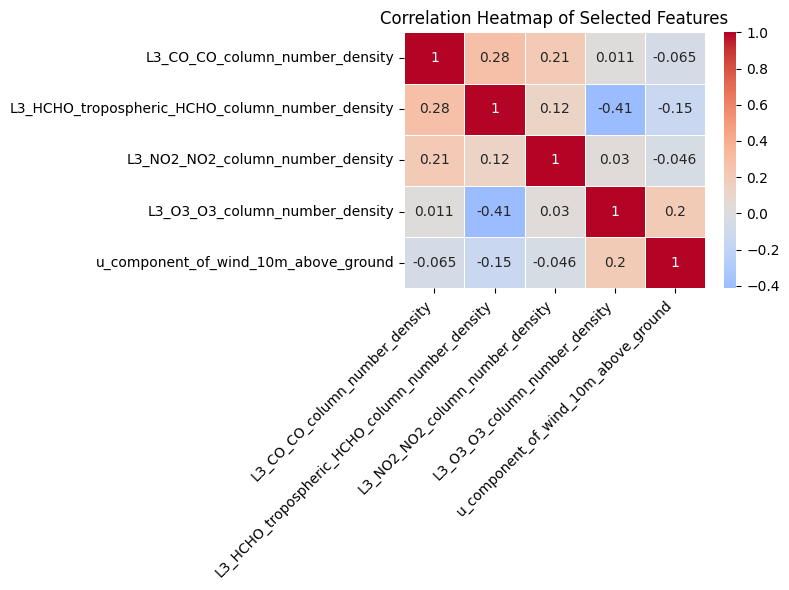

In [22]:
#CHECK FOR MULTICOLINEARITY

import matplotlib.pyplot as plt
import seaborn as sns

# Select the specified features for the heatmap
selected_features = [
    "L3_CO_CO_column_number_density",
    "L3_HCHO_tropospheric_HCHO_column_number_density",
    "L3_NO2_NO2_column_number_density",
    "L3_O3_O3_column_number_density",
    "u_component_of_wind_10m_above_ground"
]

# Create a DataFrame with the selected features
df_selected = df_train_split[selected_features]

# Calculate the correlation matrix for the selected features
correlation_matrix = df_selected.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Set title and labels
plt.title('Correlation Heatmap of Selected Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

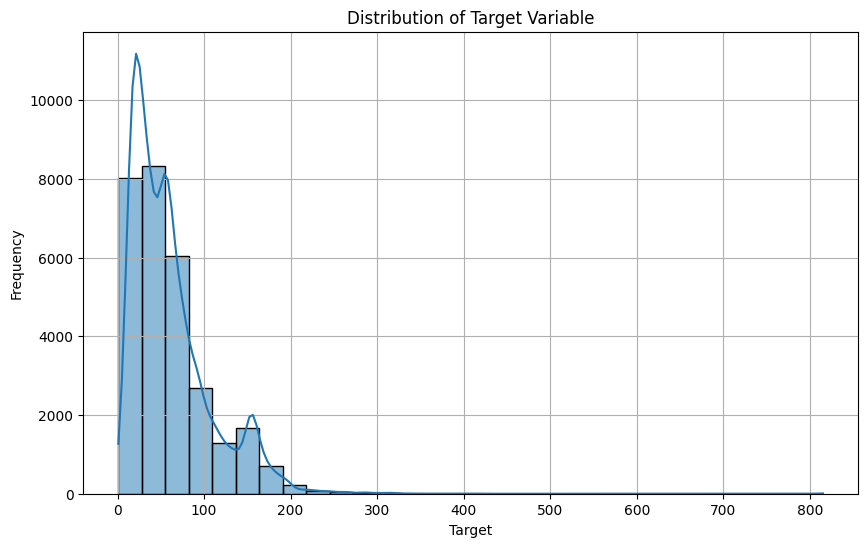

In [23]:
#Distribution target variable

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your target variable is named 'target' in the DataFrame 'df'
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(df_train_split['target'], kde=True, bins=30)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [24]:
# Outliers identification in target variable

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_train_split['target'].quantile(0.25)
Q3 = df_train_split['target'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df_train_split[(df_train_split['target'] < lower_bound) | (df_train_split['target'] > upper_bound)]

print(f"Number of outliers: {outliers.shape[0]}")
print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")


Number of outliers: 1169
Lower bound for outliers: -57.5
Upper bound for outliers: 162.5
